## Analysis of weather prediction with Multi-layer perceptron

### Get the data for Keys

In [4]:
import pandas as pd
import getDegrees_Y 

start_date = "2012-06-01"
end_date = "2012-07-1"

temperatures = pd.read_csv("Chennai_temperature_data.csv")
Y_keys = temperatures.keys()

planet_data = pd.read_csv("Chennai_PP_data.csv")

dates_string = getDegrees_Y.getDateString(start_date,end_date)
ret = getDegrees_Y.getDegrees_Y(dates_string,temperatures,planet_data,6)

                      0
0                  Date
1          Avg Humidity
2   Dew point (celcius)
3          Max Humidity
4              Max Temp
5   Max Wind Spd (Km/h)
6             Mean Temp
7          Min Humidity
8              Min Temp
9        Sea pres (hPa)
10      Wind Spd (Km/h)


In [5]:
pd.DataFrame(ret["X_keys"])

,0
0,Ascendant (As)_Degree
1,Jupiter (Ju)_Degree
2,Ketu (Ke)_Degree
3,Mars (Ma)_Degree
4,Mercury (Me)_Degree
5,Moon (Mo)_Degree
6,Neptune (Ne)_Degree
7,Rahu (Ra)_Degree
8,Saturn (Sa)_Degree
9,Sun (Su)_Degree


In [6]:
pd.DataFrame(Y_keys)

,0
0,Date
1,Avg Humidity
2,Dew point (celcius)
3,Max Humidity
4,Max Temp
5,Max Wind Spd (Km/h)
6,Mean Temp
7,Min Humidity
8,Min Temp
9,Sea pres (hPa)


## Analysis

### 1) 3 layer NN

#### a) Without feature scaling of input

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________
None
Training data : 5247 5247
Epoch 1/50
5247/5247 [==============================] - 1s 197us/step - loss: 226.8868
Epoch 2/50
5247/5247 [==============================] - 1s 168us/step - loss: 93.2138
Epoch 3/50
5247/5247 [==============================] - 1s 169us/step - lo

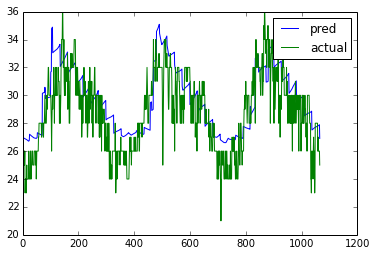

In [8]:
import NN
from keras.models import Sequential 
from keras.layers import Dense
%matplotlib inline 

if __name__ == "__main__":

   indep_var_idx = [3,4,5,9,13]
   dep_var_idx = 6
   feature_scaling = False

   tr_start = "2000-06-01"
   tr_end = "2014-12-1"

   test_start = "2015-01-01"
   test_end = "2017-12-1"


   regressor = Sequential()
   ## 2 hidden layers with 5 nodes each
   regressor.add(Dense(units=5,kernel_initializer='uniform',activation='relu',input_shape=(len(indep_var_idx),)))
   regressor.add(Dense(units=5,kernel_initializer='uniform',activation='relu'))
   regressor.add(Dense(units=5,kernel_initializer='uniform',activation='relu'))

   ## Output layer 
   regressor.add(Dense(units=1,kernel_initializer='uniform',activation=None))

   print(regressor.summary())

   regressor.compile(optimizer='adam',loss='mean_squared_error')

   plt = NN.train_test(indep_var_idx,dep_var_idx,feature_scaling,tr_start,tr_end,test_start,test_end,regressor,10,50)
   plt.show()

#### b) With Feature scaling of input

Converges sooner with better MSE

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________
None
Training data : 5247 5247
Epoch 1/50


/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


5247/5247 [==============================] - 1s 199us/step - loss: 546.4019
Epoch 2/50
5247/5247 [==============================] - 1s 166us/step - loss: 28.6696
Epoch 3/50
5247/5247 [==============================] - 1s 168us/step - loss: 7.0865
Epoch 4/50
5247/5247 [==============================] - 1s 166us/step - loss: 3.8164
Epoch 5/50
5247/5247 [==============================] - 1s 176us/step - loss: 3.2651
Epoch 6/50
5247/5247 [==============================] - 1s 167us/step - loss: 3.1171
Epoch 7/50
5247/5247 [==============================] - 1s 167us/step - loss: 3.0321
Epoch 8/50
5247/5247 [==============================] - 1s 177us/step - loss: 2.9765
Epoch 9/50
5247/5247 [==============================] - 1s 168us/step - loss: 2.9434
Epoch 10/50
5247/5247 [==============================] - 1s 167us/step - loss: 2.9299
Epoch 11/50
5247/5247 [==============================] - 1s 167us/step - loss: 2.9207
Epoch 12/50
5247/5247 [==============================] - 1s 170us/step 

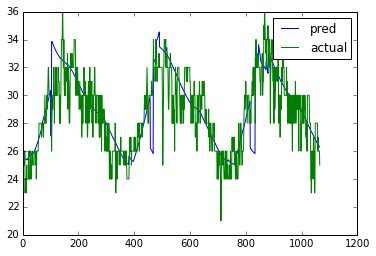

In [9]:
import NN
from keras.models import Sequential 
from keras.layers import Dense
%matplotlib inline 

if __name__ == "__main__":

   indep_var_idx = [3,4,5,9,13]
   dep_var_idx = 6
   feature_scaling = True

   tr_start = "2000-06-01"
   tr_end = "2014-12-1"

   test_start = "2015-01-01"
   test_end = "2017-12-1"


   regressor = Sequential()
   ## 2 hidden layers with 5 nodes each
   regressor.add(Dense(units=5,kernel_initializer='uniform',activation='relu',input_shape=(len(indep_var_idx),)))
   regressor.add(Dense(units=5,kernel_initializer='uniform',activation='relu'))
   regressor.add(Dense(units=5,kernel_initializer='uniform',activation='relu'))

   ## Output layer 
   regressor.add(Dense(units=1,kernel_initializer='uniform',activation=None))

   print(regressor.summary())

   regressor.compile(optimizer='adam',loss='mean_squared_error')

   plt = NN.train_test(indep_var_idx,dep_var_idx,feature_scaling,tr_start,tr_end,test_start,test_end,regressor,10,50)
   plt.show()

#### c) Including Rahu

Performance improves. MSE decreases

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_34 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_35 (Dense)             (None, 5)                 35        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 6         
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________
None
Training data : 5247 5247
Epoch 1/50


/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


5247/5247 [==============================] - 1s 236us/step - loss: 581.4365
Epoch 2/50
5247/5247 [==============================] - 1s 166us/step - loss: 66.0692
Epoch 3/50
5247/5247 [==============================] - 1s 165us/step - loss: 5.0145
Epoch 4/50
5247/5247 [==============================] - 1s 166us/step - loss: 4.5692
Epoch 5/50
5247/5247 [==============================] - 1s 166us/step - loss: 4.2080
Epoch 6/50
5247/5247 [==============================] - 1s 168us/step - loss: 3.8871
Epoch 7/50
5247/5247 [==============================] - 1s 167us/step - loss: 3.6256
Epoch 8/50
5247/5247 [==============================] - 1s 180us/step - loss: 3.3902
Epoch 9/50
5247/5247 [==============================] - 1s 174us/step - loss: 3.2127
Epoch 10/50
5247/5247 [==============================] - 1s 166us/step - loss: 3.0863
Epoch 11/50
5247/5247 [==============================] - 1s 168us/step - loss: 2.9932
Epoch 12/50
5247/5247 [==============================] - 1s 167us/step 

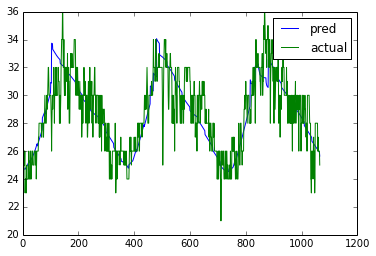

In [13]:
import NN
from keras.models import Sequential 
from keras.layers import Dense
%matplotlib inline 

if __name__ == "__main__":

   indep_var_idx = [3,4,5,7,9,13]
   dep_var_idx = 6
   feature_scaling = True

   tr_start = "2000-06-01"
   tr_end = "2014-12-1"

   test_start = "2015-01-01"
   test_end = "2017-12-1"


   regressor = Sequential()
   ## 2 hidden layers with 5 nodes each
   regressor.add(Dense(units=len(indep_var_idx),kernel_initializer='uniform',activation='relu',input_shape=(len(indep_var_idx),)))
   regressor.add(Dense(units=len(indep_var_idx),kernel_initializer='uniform',activation='relu'))
   regressor.add(Dense(units=5,kernel_initializer='uniform',activation='relu'))

   ## Output layer 
   regressor.add(Dense(units=1,kernel_initializer='uniform',activation=None))

   print(regressor.summary())

   regressor.compile(optimizer='adam',loss='mean_squared_error')

   plt = NN.train_test(indep_var_idx,dep_var_idx,feature_scaling,tr_start,tr_end,test_start,test_end,regressor,10,50)
   plt.show()

#### d) Include jupiter

Performance decreases

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_38 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_39 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 6         
Total params: 158
Trainable params: 158
Non-trainable params: 0
_________________________________________________________________
None
Training data : 5247 5247
Epoch 1/50


/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


5247/5247 [==============================] - 1s 220us/step - loss: 402.0427
Epoch 2/50
5247/5247 [==============================] - 1s 169us/step - loss: 11.0271
Epoch 3/50
5247/5247 [==============================] - 1s 168us/step - loss: 4.9927
Epoch 4/50
5247/5247 [==============================] - 1s 168us/step - loss: 3.9555
Epoch 5/50
5247/5247 [==============================] - 1s 175us/step - loss: 3.6385
Epoch 6/50
5247/5247 [==============================] - 1s 176us/step - loss: 3.4233
Epoch 7/50
5247/5247 [==============================] - 1s 167us/step - loss: 3.3005
Epoch 8/50
5247/5247 [==============================] - 1s 169us/step - loss: 3.1772
Epoch 9/50
5247/5247 [==============================] - 1s 167us/step - loss: 3.0821
Epoch 10/50
5247/5247 [==============================] - 1s 167us/step - loss: 3.0323
Epoch 11/50
5247/5247 [==============================] - 1s 169us/step - loss: 2.9506
Epoch 12/50
5247/5247 [==============================] - 1s 166us/step 

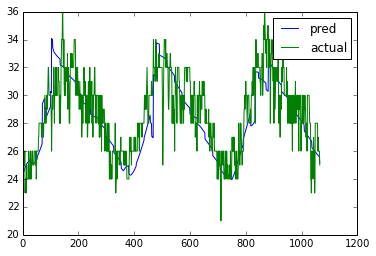

In [14]:
import NN
from keras.models import Sequential 
from keras.layers import Dense
%matplotlib inline 

if __name__ == "__main__":

   indep_var_idx = [1,3,4,5,7,9,13]
   dep_var_idx = 6
   feature_scaling = True

   tr_start = "2000-06-01"
   tr_end = "2014-12-1"

   test_start = "2015-01-01"
   test_end = "2017-12-1"


   regressor = Sequential()
   ## 2 hidden layers with 5 nodes each
   regressor.add(Dense(units=len(indep_var_idx),kernel_initializer='uniform',activation='relu',input_shape=(len(indep_var_idx),)))
   regressor.add(Dense(units=len(indep_var_idx),kernel_initializer='uniform',activation='relu'))
   regressor.add(Dense(units=5,kernel_initializer='uniform',activation='relu'))

   ## Output layer 
   regressor.add(Dense(units=1,kernel_initializer='uniform',activation=None))

   print(regressor.summary())

   regressor.compile(optimizer='adam',loss='mean_squared_error')

   plt = NN.train_test(indep_var_idx,dep_var_idx,feature_scaling,tr_start,tr_end,test_start,test_end,regressor,10,50)
   plt.show()